In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import scanpy as sc
!pip install lifelines
!pip install scanpy[louvain]

# set scanpy plotting parameter to dpi = 150
sc.settings.set_figure_params(dpi=150)

# Set up data folder
from pathlib import Path
# change this to where you save the data
DATA = Path("/home/juanthe3_gmail_com/Genomics")

In [3]:
#loading data

ge = sc.read_csv(DATA / "RAWDATA_sc_endoderm_all_cells_counts.csv")
meta = pd.read_csv(DATA / "sc_endoderm_all_cells_metadata.csv",
                   index_col=0)

ge.shape

(113051, 20897)

In [4]:
#concatenate elements of meta data to count matrix
ge.obs = pd.concat([ge.obs, meta.loc[ge.obs_names]], axis=1, sort=False)
ge.obs.head()

Cluster Timepoint  CellType
E85anterior2A_TTTATGCTCGGATGGA  E8.75_ap: 0  E8.75_ap       Mes
E85anterior2A_TTTATGCTCCTAGGGC  E8.75_ap: 0  E8.75_ap       Mes
E85anterior2A_TTTATGCTCCAACCAA   E8.75_ap:2     E8.75  Gut tube
E85anterior2A_TTTATGCAGTGGGTTG  E8.75_ap: 8  E8.75_ap       Mes
E85anterior2A_TTTACTGTCGGAGGTA   E8.75_ap:3     E8.75  Gut tube

In [5]:
#ANALYZING ENTIRE DATASET!


#If memory error comes up. Restart kernel/instance if that's the case
sc.tl.pca(ge, svd_solver='arpack')
sc.pp.neighbors(ge, n_neighbors=15, n_pcs=25)  #increase number of components?
sc.pp.scale(ge, max_value=10)

/home/juanthe3_gmail_com/anaconda3/envs/genomics/lib/python3.6/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../anaconda3/envs/genomics/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/juanthe3_gmail_com/anaconda3/envs/genomics/lib/python3.6/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..

... storing 'Cluster' as categorical
... storing 'Timepoint' as categorical
... storing 'CellType' as categorical


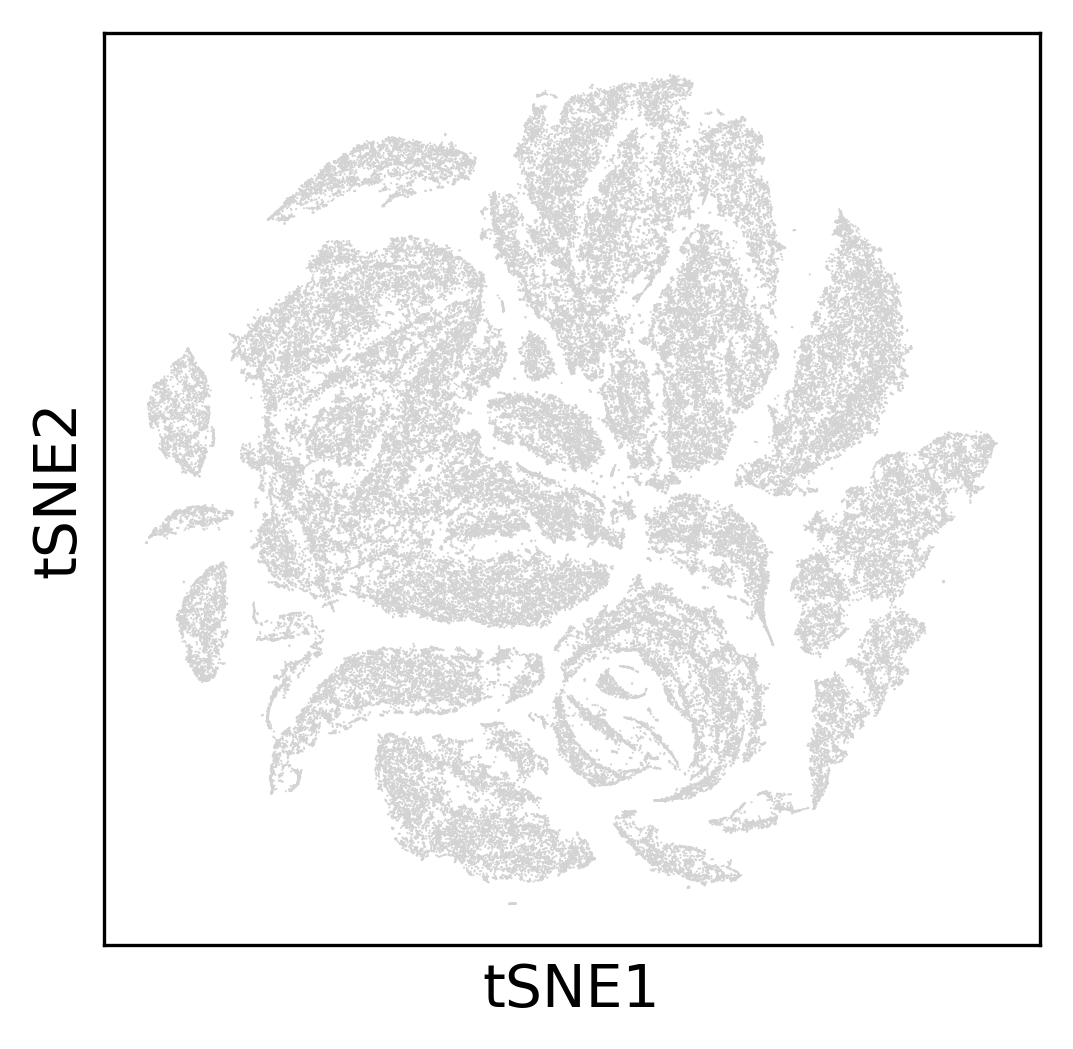

In [6]:
#generating tSNE plot for entire data set
sc.tl.tsne(ge)
sc.settings.set_figure_params(dpi=150)
sc.pl.tsne(ge)

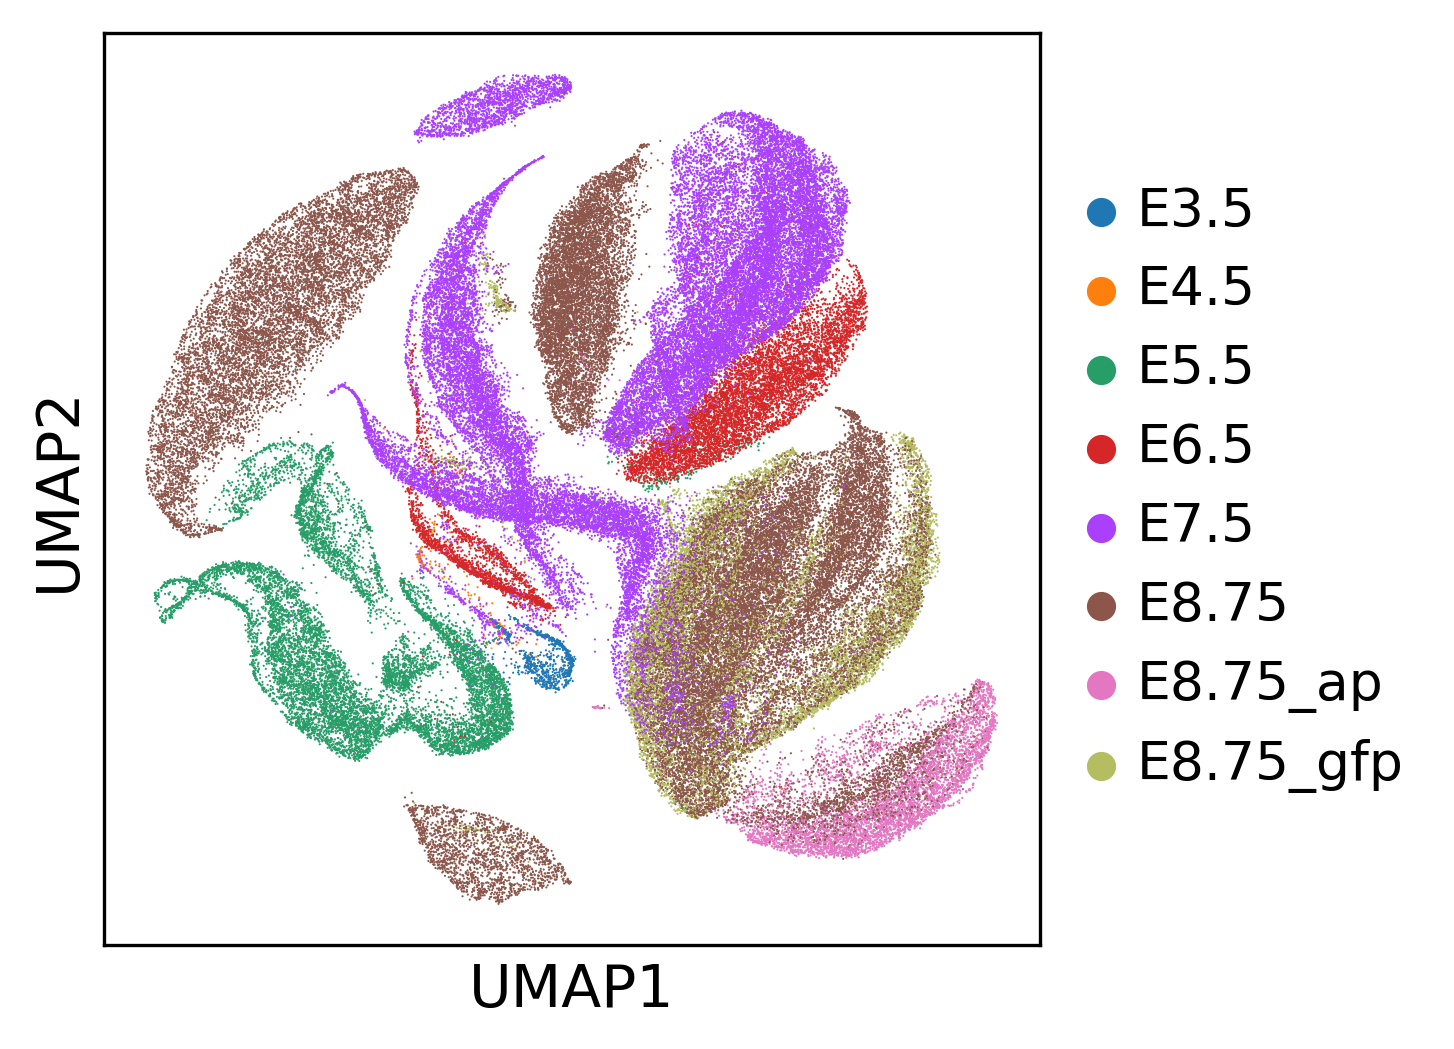

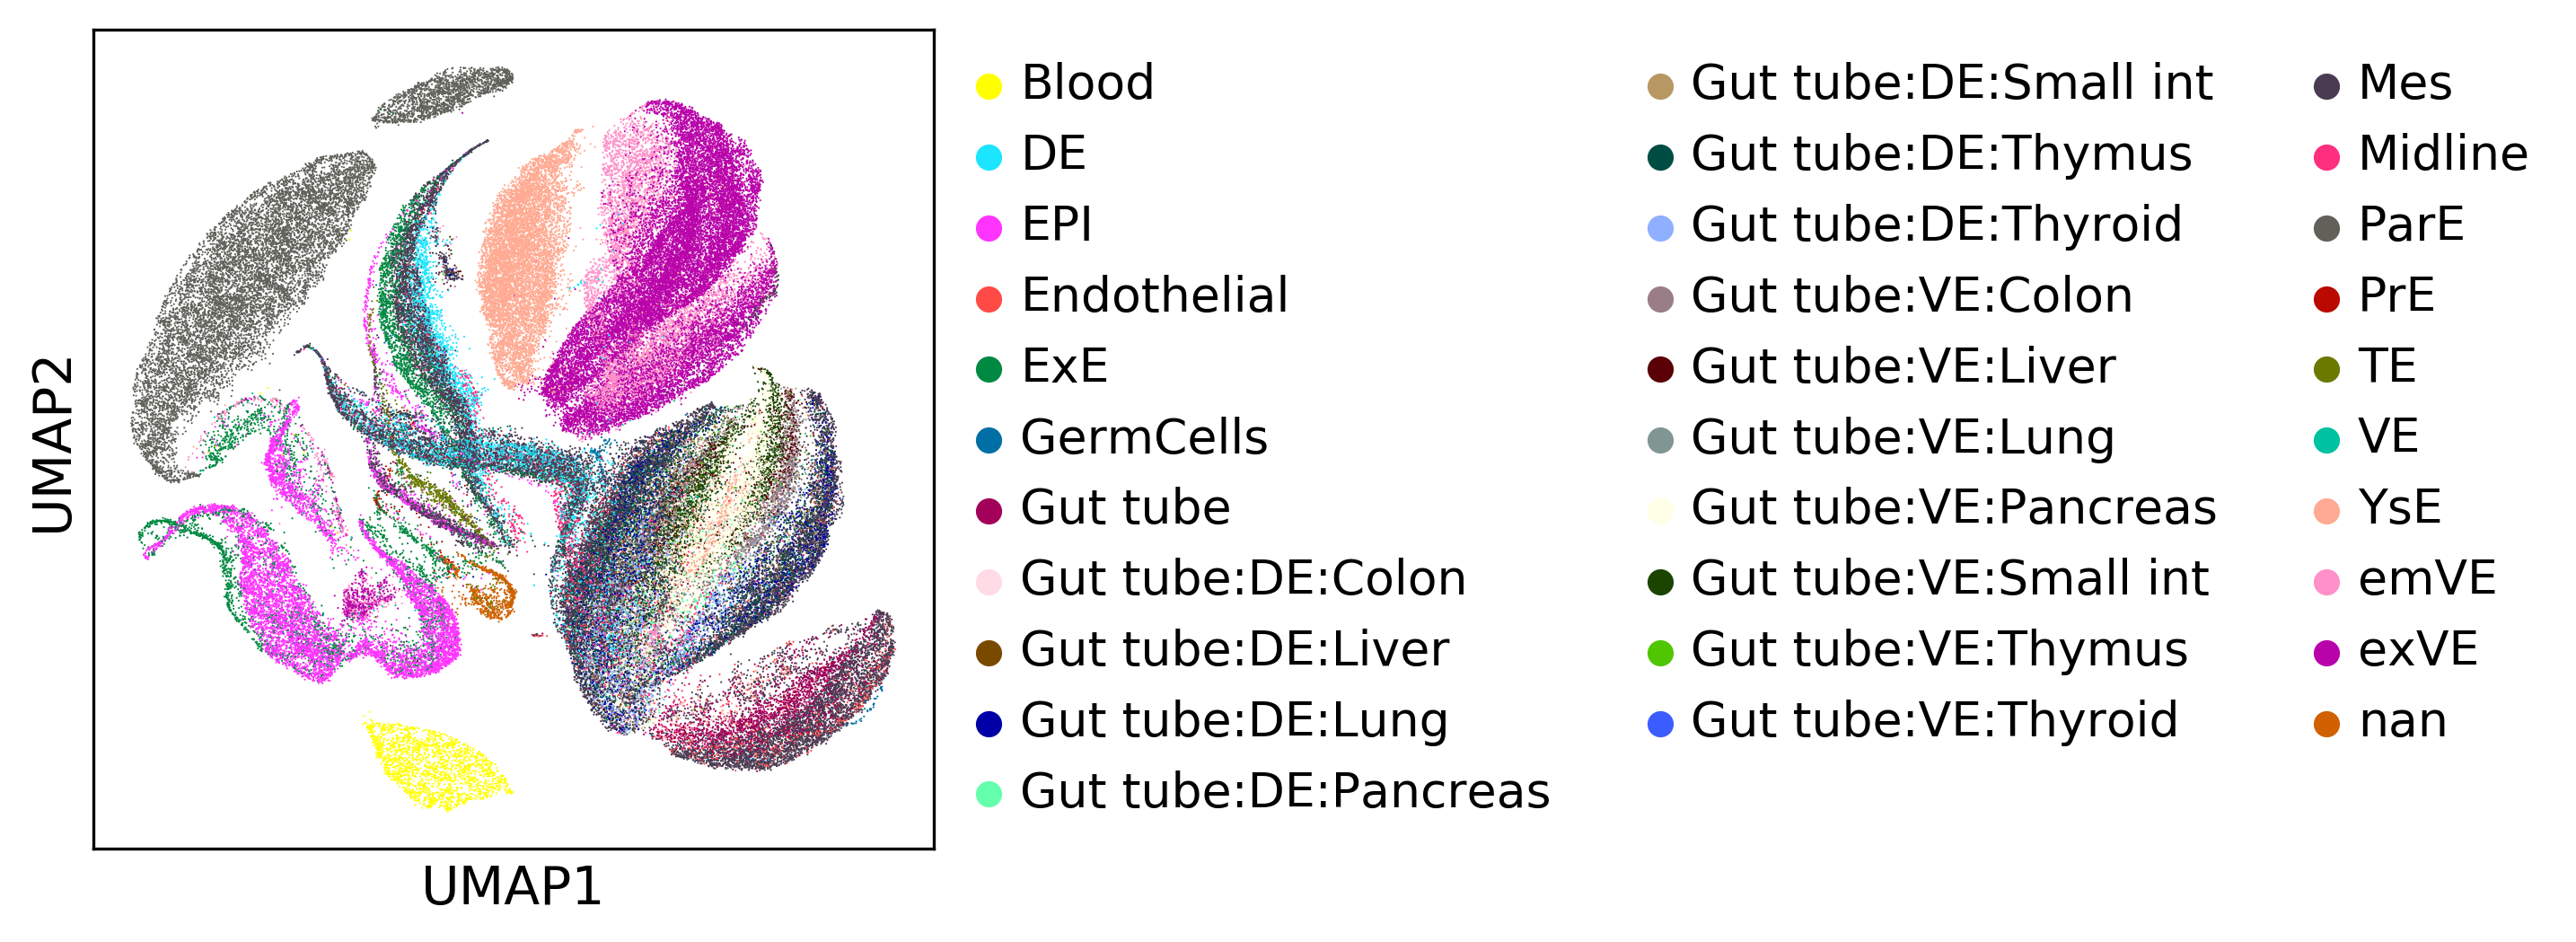

In [7]:
#UMAP visualizations

sc.tl.umap(ge)
sc.settings.set_figure_params(dpi=150)

sc.tl.louvain(ge) 
#sc.pl.umap(ge, color=['louvain']) 
sc.pl.umap(ge, title= "", color=['Timepoint'])
sc.pl.umap(ge, title= "", color=['CellType']) 
#sc.pl.umap(ge, color=['Cluster'])



Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 43.62737226486206 seconds
Jaccard graph constructed in 12.670117378234863 seconds
Wrote graph to binary file in 14.231915473937988 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.930928
Louvain completed 21 runs in 113.61055183410645 seconds
PhenoGraph complete in 184.61356782913208 seconds


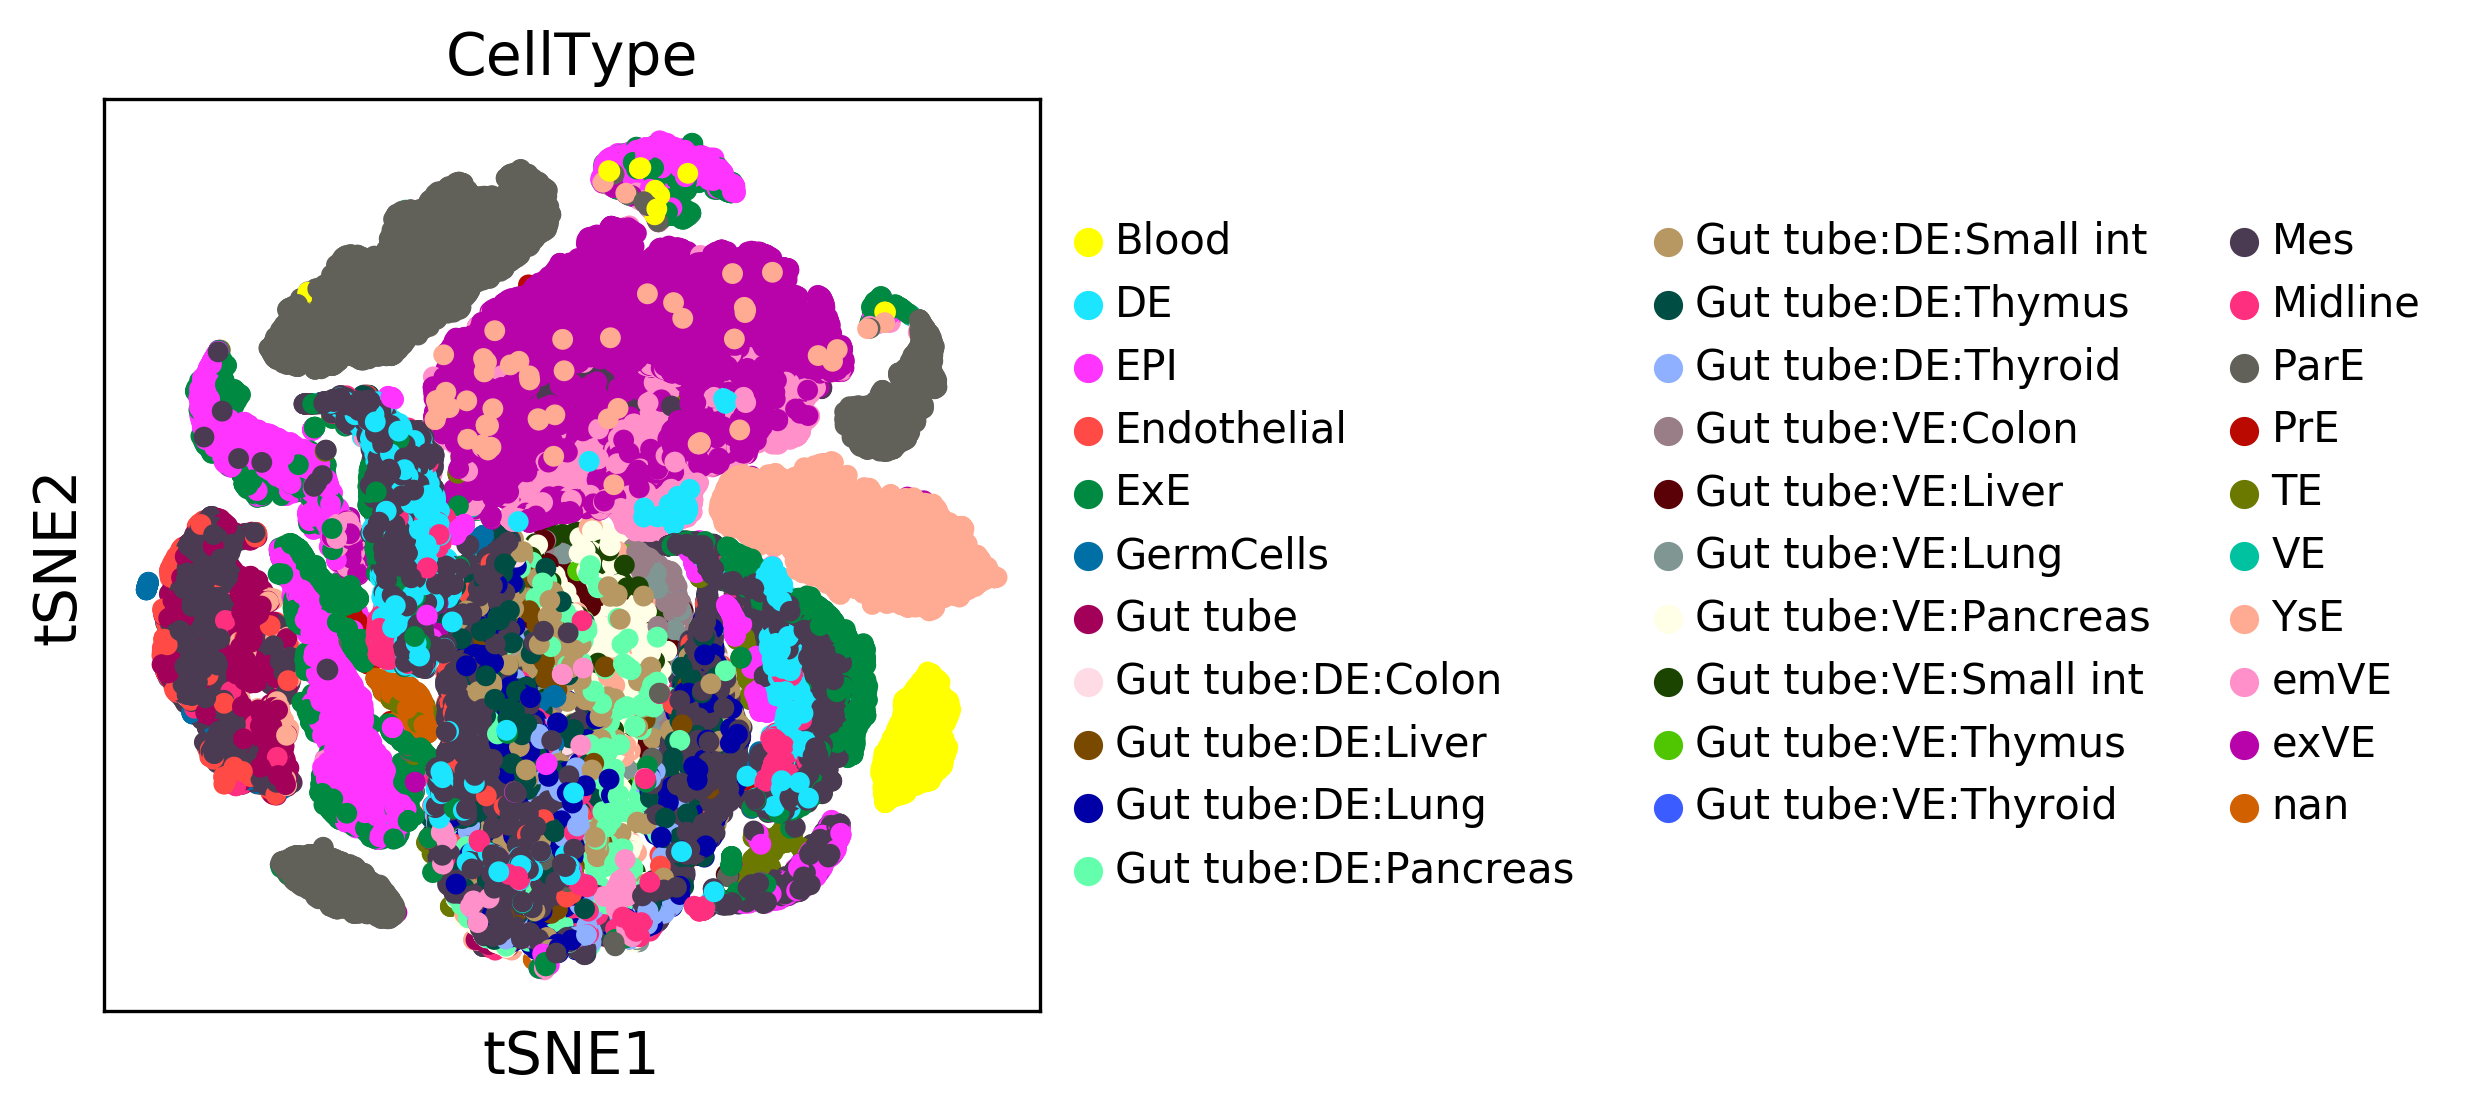

In [8]:
#tSNE phenograph result (organized by cell type)
result = sc.external.tl.phenograph(ge.obsm['X_pca'], k = 30) #compute phenograph clusters
sc.tl.tsne(ge, random_state = 7)
sc.pl.tsne(ge, color = ['CellType'], s = 100, palette = sc.pl.palettes.godsnot_64, legend_fontsize = 10)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 55.44066762924194 seconds
Jaccard graph constructed in 14.4046311378479 seconds
Wrote graph to binary file in 14.785815000534058 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.931155
After 4 runs, maximum modularity is Q = 0.932177
Louvain completed 24 runs in 142.06110453605652 seconds
PhenoGraph complete in 227.19583749771118 seconds


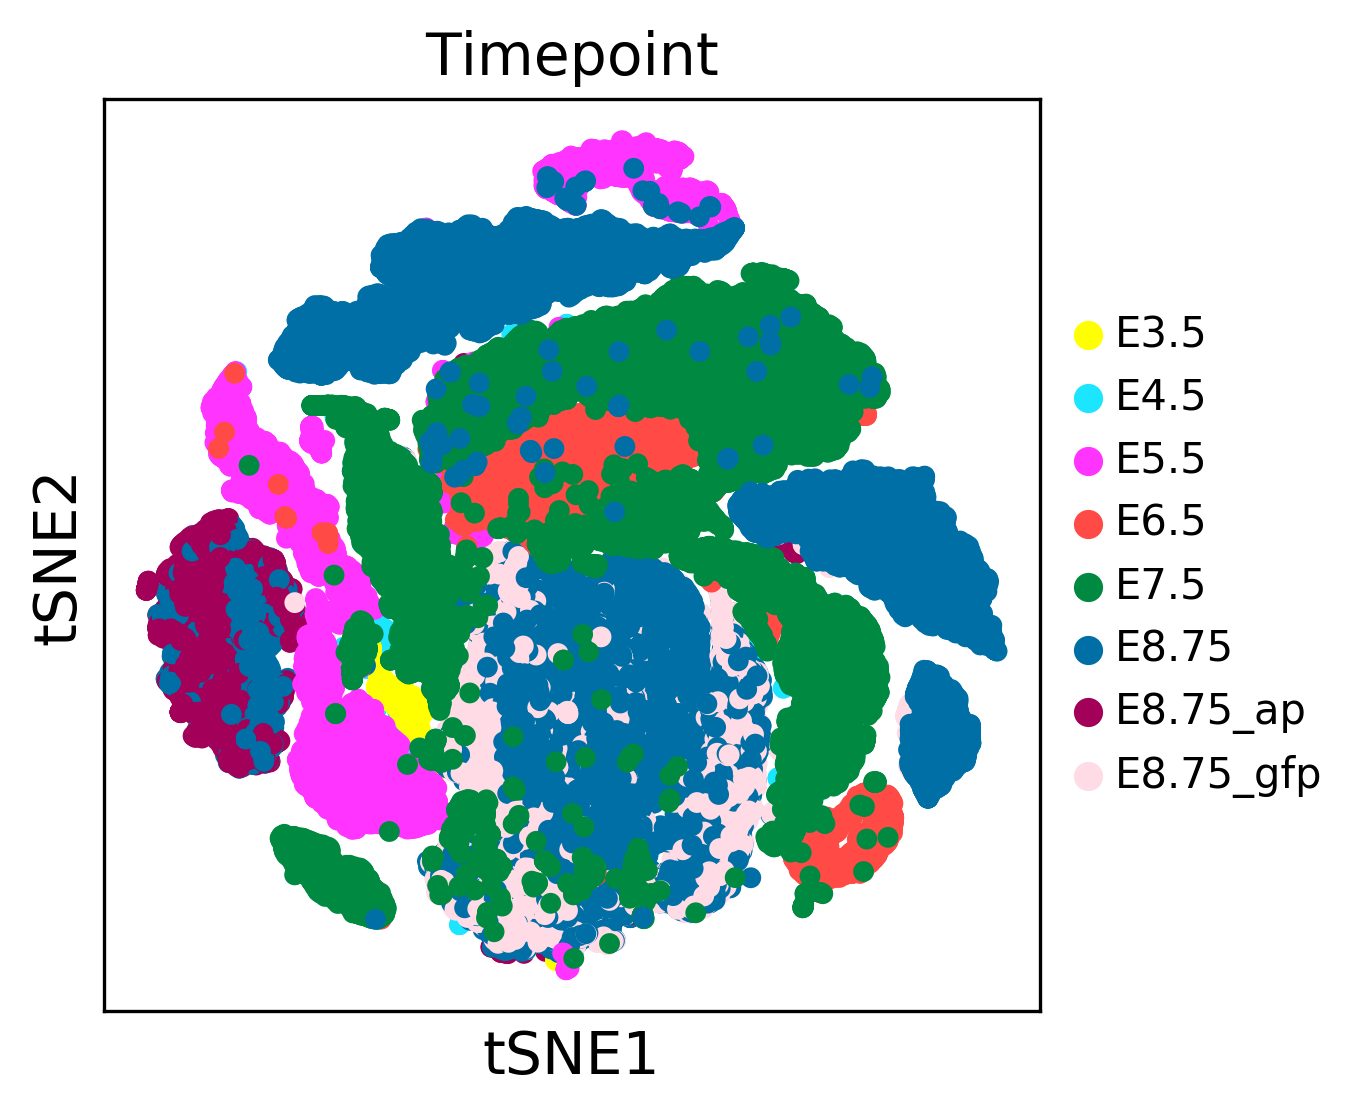

In [9]:
#tSNE phenograph (organized by time point)
result = sc.external.tl.phenograph(ge.obsm['X_pca'], k = 30) #compute phenograph clusters
sc.tl.tsne(ge, random_state = 7)
sc.pl.tsne(ge, color = ['Timepoint'], s = 100, palette = sc.pl.palettes.godsnot_64, legend_fontsize = 10) 